# Figure 2: bistability plot for the mean-field model, $\phi=[0.1,1]$ versus invasion threshold $N_w(0)/N_0$

## Abby Barlow, University of Bath
## Ben Adams, University of Bath

Importing required libraries

In [1]:
from scipy.optimize import fsolve
from scipy.integrate import odeint, solve_ivp
import numpy as np
import time
import pandas as pd
import sympy as sp
import math
import pylab as plt
import matplotlib

Importing required scripts

In [2]:
import importlib
import Hughes_model

Hughes_ODEs = Hughes_model.Hughes_ODEs  # defining ODE function (mean-field model Hughes(2013))
F = Hughes_model.F_hughes   # defining Dye's larval density function

# scripts autosave, so no need to re-run code chunk after making changes
%load_ext autoreload
%autoreload 2

Parameter values

In [3]:
days = 2000                          # no. of days in simulation
tStart, tEnd = 0, days               # start time and end time (days) of simulation
tEval = np.linspace(tStart, tEnd)    # output points

Q = 30                   # reproductive carrying capacity
d = 12/100               # per capita death rate
v = 10/10                # probability of vertical transmission of Wolbachia
u = 10/10                # probability that infected male and uninfected female produce inviable offspring
delta = 1                # ratio of Wolbachia-infected death rate versus wild-type
dw = delta*d             # Wolbachia-positive death rate

k = 0.3                  # mosquito competition parameter
h = 0.19*100**k          # other mosquito competition parameter
b = round(d/F(10,h,k),2) # birth rate fitted for Dye's larval density function

sep = 5*100              # number of points evaluate over invasion threshol range

Finding the basin of attraction boundary

With respect to the Wolbachia-only steady state

In [4]:
phivec = np.linspace(0.1,1,199)        # range of phi values will iterate over
invasion_prop = np.zeros_like(phivec)  # initialising array to store invasion threshold
N0 = 10                           # initial household size (remains fixed)
y0 = np.zeros(2)                  # initialising array for intial household state (no. of wild-types and W-infected)

for i in range(len(phivec)):     # looping over all phi values
    for j in range(sep+1):       # looping over all initial ratios of wild-types to W-infected
        y0[0] = (sep-j)*N0/sep   # current initial number of wild-types
        y0[1] = j*N0/sep         # current initial number of W-infected
        
        params = (u, v, phivec[i], delta, b, d, dw, Q, h, k)  # parameter values fed into the ODE solver
        # solving the ODEs after 2000 days
        sol = solve_ivp(Hughes_ODEs, y0 = y0, method='LSODA', t_span = [tStart, tEnd], t_eval = tEval, args=params) 
        sol_df = pd.DataFrame(np.transpose(sol.y))  # putting into data frame
        
        nm_star = sol_df.iloc[len(tEval)-1,0]  # extracting the wild-type solution at 2000 days
        nw_star = sol_df.iloc[len(tEval)-1,1]  # extracting the W-infected solution
        
        E2 = np.array([0,(np.log(d*delta/(b*phivec[i]*v))/-h)**(1/k)])  # wolbachia only SS values
        # change to this when using other larval density function np.array([0,Q*(1-dw/(b*phivec[i]*v))])
        if np.all([nm_star,nw_star]-E2<1e-3):   # if sufficiently close to Wolbachia-only SS
            invasion_prop[i] = j/sep            # record invasion threshold
            break                               # break to next phi value

C:\Users\abby2\AppData\Local\Temp/ipykernel_16924/863677315.py:19: RuntimeWarning: invalid value encountered in double_scalars
  E2 = np.array([0,(np.log(d*delta/(b*phivec[i]*v))/-h)**(1/k)])  # wolbachia only SS values


With respect to the extinxtion steady state

In [5]:
phivec = np.linspace(0.1,1,199)        # range of phi values will iterate over
invasion_prop2 = np.zeros_like(phivec) # initialising array to store invasion threshold
N0 = 10                                # initial household size (remains fixed)
y0 = np.zeros(2)                 # initialising array for intial household state (no. of wild-types and W-infected)

for i in range(len(phivec)):        # looping over all phi values
    for j in range(sep+1):          # looping over all initial ratios of wild-types to W-infected
        y0[0] = (sep-j)*N0/sep      # current initial number of wild-types
        y0[1] = j*N0/sep            # current initial number of W-infected
        
        params = (u, v, phivec[i], delta, b, d, dw, Q, h, k)   # parameter values fed into the ODE solver
        # solving the ODEs after 2000 days
        sol = solve_ivp(Hughes_ODEs, y0 = y0, method='LSODA', t_span = [tStart, tEnd], t_eval = tEval, args=params) 
        sol_df = pd.DataFrame(np.transpose(sol.y))  # putting into data frame
        
        nm_star = sol_df.iloc[len(tEval)-1,0]  # extracting the wild-type solution at 2000 days
        nw_star = sol_df.iloc[len(tEval)-1,1]  # extracting the W-infected solution
        
        E1 = np.array([0,0])  # extinction steady state
        if np.all([nm_star,nw_star]-E1<1e-5): # if sufficiently close to extinction SS
            invasion_prop2[i] = j/sep         # record invasion threshold
            break                             # break to next phi value

Plotting the figure

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


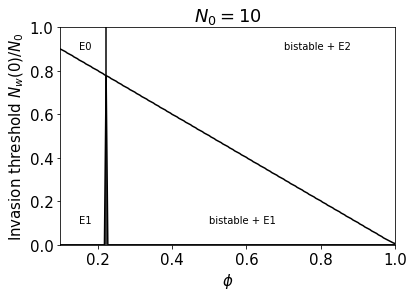

In [6]:
matplotlib.rcParams.update({'font.size': 15})  # font size
phivec = np.linspace(0.1,1,199)                # phi range vector

plt.plot(phivec,invasion_prop, color='black')   # plot basin of attraction wrt W-infected only SS
plt.plot(phivec,invasion_prop2, color='black')  # plot basin of attraction wrt extinction SS
plt.axvline(d/b, color='black')                 # plot where W-infected SS no longer exists 

plt.ylim(0,1)        # setting y axis limits
plt.xlim(0.1,1)      # setting x axis limits
plt.xlabel('$\phi$')      # x label
plt.ylabel('Invasion threshold $N_w(0)/N_0$')   # y label
plt.title('$N_0=10$')   # title

plt.text(0.7,0.9, 'bistable + E2', fontsize = 10) # labelling the regions of attraction and stability
plt.text(0.5,0.10, 'bistable + E1', fontsize = 10)
plt.text(0.15,0.1, 'E1' , fontsize = 10)
plt.text(0.15,0.9, 'E0' , fontsize = 10)
plt.savefig('Invasion_threshold_v1_wild10_dye.pdf', bbox_inches='tight')  # save figure

Save invasion threshold arrays

In [8]:
np.save('invasion_prop.npy',invasion_prop)
np.save('invasion_prop2.npy',invasion_prop2)